# Plastics and the Oceans

Microplastic pollution in the oceans has become a significant environmental concern, threatening marine life, human health, and the global ecosystem. The spread and concentration of microplastics across different ocean regions, along with their impact on water quality, are issues that require deeper understanding. This project aims to explore patterns in microplastic pollution by analyzing data from various sampling methods, geographical locations, and ocean regions. By identifying high-risk areas, we hope to provide researchers and the general public with better insights into the extent of the problem, encouraging more informed actions to reduce pollution and mitigate its effects.

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "2"


In [3]:
import numpy as np
import chardet

# pandas for data pre-processing
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# sklearn for machine learning
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# for drawing dendogram
import scipy.cluster.hierarchy as ch
from scipy.spatial.distance import cdist

# for creating a model
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import seaborn as sns
import streamlit as st

In [4]:
dataset = 'marine_microplastics.xlsx'

In [5]:
df = pd.read_excel(dataset, header=0)

In [6]:
df

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,Long Reference,DOI,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID
0,9676,Atlantic Ocean,Unknown,Unknown,Grab sample,0.0180,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,2015-08-11,a77121b2-e113-444e-82d9-7af11d62fdd2
1,6427,Pacific Ocean,Unknown,Unknown,Neuston net,0.0000,pieces/m3,0-0.0005,Very Low,Law et al.2014,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,2002-12-18,be27c450-02ca-4261-8d89-cae21108e6cc
2,10672,Pacific Ocean,Unknown,Unknown,Manta net,0.0130,pieces/m3,0.005-1,Medium,Goldstein et al.2013,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,2006-10-17,23effcdd-35b7-4e1e-adb4-390693a287d3
3,13921,Atlantic Ocean,Unknown,Unknown,Aluminum bucket,1368.0000,pieces/m3,>=10,Very High,Queiroz et al.2022,"Queiroz, A.F.dos S., A.S. da Conceição, D. Che...",https://doi.org/10.1016/j.scitotenv.2022.156259,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,2018-10-17,16d77822-0533-4116-97b9-0bdb592f3d6e
4,9344,Pacific Ocean,Unknown,Unknown,Grab sample,0.0010,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,2015-01-03,b9e435e3-9e86-4143-8b51-877e5dcdc7a6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20420,9366,Atlantic Ocean,Unknown,Unknown,Grab sample,0.0110,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,17.100000,-47.550000,2015-02-01,fd4db6d6-aed7-48b1-a22b-402557112e2f
20421,4683,Atlantic Ocean,Caribbean Sea,Unknown,Neuston net,0.0216,pieces/m3,0.005-1,Medium,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,21.390000,-81.960000,2001-03-14,83a8208e-2d06-4ad9-bcd9-81e29d57e0aa
20422,6043,Atlantic Ocean,Unknown,Unknown,Neuston net,0.0000,pieces/m3,0-0.0005,Very Low,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,24.140000,-81.980000,2008-05-01,0fd72d83-cd27-42e1-b63a-b015c23b28d2
20423,20169,Atlantic Ocean,Unknown,Unknown,Hand picking,NaN,pieces/10 mins,40-200,High,Tunnell et al. 2020,"Tunnell, Jace W.; Dunning, Kelly H.; Scheef, L...",https://doi.org/10.1016/j.marpolbul.2019.110794,University of Texas Marine Science Institute,Nurdle Patrol,259486,https://www.ncei.noaa.gov/access/metadata/land...,39.924800,-75.127200,2021-10-28,fc84069e-c782-4c3d-bf6b-265535969d8e


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20425 entries, 0 to 20424
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OBJECTID          20425 non-null  int64         
 1   Oceans            20154 non-null  object        
 2   Regions           20425 non-null  object        
 3   SubRegions        20425 non-null  object        
 4   Sampling Method   20425 non-null  object        
 5   Measurement       14613 non-null  float64       
 6   Unit              20425 non-null  object        
 7   Density Range     20425 non-null  object        
 8   Density Class     20425 non-null  object        
 9   Short Reference   20425 non-null  object        
 10  Long Reference    20425 non-null  object        
 11  DOI               20425 non-null  object        
 12  Organization      20425 non-null  object        
 13  Keywords          20407 non-null  object        
 14  Accession Number  2042

# Group by class attribute

## If 0 or blank then it was picked up on a beach by a tourist or local

In [10]:
df['Density Class'] = df['Density Class'].fillna(0)
df['Sampling Method'] = df['Sampling Method'].fillna(0)
df['Measurement'] = df['Measurement'].fillna(0)
df['Accession Number'] = df['Accession Number'].fillna(0)
df['Latitude'] = df['Latitude'].fillna(0)
df['Longitude'] = df['Longitude'].fillna(0)
df['Date'] = df['Date'].fillna('00-00-0000')

In [11]:
df['Density Class']=df['Density Class'].replace({"Very Low": 1, "Low": 2, "Medium": 3, "High": 4, "Very High": 5})

C:\Users\mikke\AppData\Local\Temp\ipykernel_14420\3833635786.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Density Class']=df['Density Class'].replace({"Very Low": 1, "Low": 2, "Medium": 3, "High": 4, "Very High": 5})


In [12]:
df['Sampling Method'].unique()

array(['Grab sample', 'Neuston net', 'Manta net', 'Aluminum bucket',
       'Megacorer', 'Intake seawater pump', 'Hand picking',
       'PVC cylinder', 'Van Dorn sampler', 'Remotely operated vehicle',
       'Metal spoon', 'AVANI net', 'Plankton net', 'Day grab',
       'Stainless steel spoon', 'Shipek grab sampler',
       'Petite Ponar benthic grab', 'Van Veen grab sampler',
       'CTD rosette sampler'], dtype=object)

### The sampling methods are ranked in how far from the beach they are used and on which dept

In [14]:
df['Sampling Method']=df['Sampling Method'].replace({
    'Grab sample': 1,
    'Hand picking': 1,
    'Aluminum bucket': 1,
    'Metal spoon': 1,
    'Stainless steel spoon': 1,
    'PVC cylinder': 1,
    'Neuston net': 2,
    'Manta net': 2,
    'Intake seawater pump': 2,
    'AVANI net': 2,
    'Plankton net': 2,
    'Megacorer': 3,
    'Van Dorn sampler': 3,
    'Day grab': 3,
    'Shipek grab sampler': 3,
    'Petite Ponar benthic grab': 3,
    'Van Veen grab sampler': 3,
    'Remotely operated vehicle': 4,
    'CTD rosette sampler': 4})

C:\Users\mikke\AppData\Local\Temp\ipykernel_14420\505745886.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sampling Method']=df['Sampling Method'].replace({


In [15]:
print(df.groupby('Unit').size())

Unit
pieces kg-1 d.w.      275
pieces/10 mins       5812
pieces/m3           14338
dtype: int64


In [16]:
df['Unit']=df['Unit'].replace({"pieces kg-1 d.w.": 1, "pieces/10 mins": 2, "pieces/m3": 3})

C:\Users\mikke\AppData\Local\Temp\ipykernel_14420\2361814448.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Unit']=df['Unit'].replace({"pieces kg-1 d.w.": 1, "pieces/10 mins": 2, "pieces/m3": 3})


In [17]:
print(df.groupby('Oceans').size())

Oceans
Arctic Ocean        178
Atlantic Ocean    15235
Indian Ocean         20
Pacific Ocean      4721
dtype: int64


### Numbered by size (Smallest to Largest)

In [19]:
df['Oceans']=df['Oceans'].replace({"Arctic Ocean": 1, "Indian Ocean": 2, "Atlantic Ocean": 3, "Pacific Ocean": 4})
df['Oceans'] = df['Oceans'].fillna(0) 


C:\Users\mikke\AppData\Local\Temp\ipykernel_14420\2183970498.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Oceans']=df['Oceans'].replace({"Arctic Ocean": 1, "Indian Ocean": 2, "Atlantic Ocean": 3, "Pacific Ocean": 4})


In [20]:
countO = df[df['Oceans'] == 0].shape[0]

countO

271

In [21]:
df = df[df['Oceans'] > 0].copy()

df.reset_index(drop=True, inplace=True)

In [22]:
df['Measurement'] = pd.to_numeric(df['Measurement'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Density Class'] = pd.to_numeric(df['Density Class'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

In [23]:
print(df.groupby('Density Range').size())

Density Range
0                933
0-0.0005        4485
0-100             97
0-2               41
0.0005-0.005    1838
0.005-1         6136
1-10            1128
1-2              377
150-200            8
2-20              36
2-40            2815
20-150           102
30000-40000        3
40-200          1274
500-30000        325
>200             230
>40000            13
>=10             313
dtype: int64


In [24]:
df['Density Range']=df['Density Range'].replace({'0': 0, '0-0.0005':0.00025, '0-100': 50,'0-2':1, '0.0005-0.005':0.00275, '0.005-1': 0.50250, '1-10':5.5, '1-2': 1.5, '150-200':175, '2-20':11, '2-40': 21, '20-150': 85, '30000-40000': 35000, '40-200':120, '500-30000':15250, '>200': 350, '>40000':45000, '>=10': 255})
df['Density Range'] = df['Density Range'].fillna(0) 

C:\Users\mikke\AppData\Local\Temp\ipykernel_14420\2266101955.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Density Range']=df['Density Range'].replace({'0': 0, '0-0.0005':0.00025, '0-100': 50,'0-2':1, '0.0005-0.005':0.00275, '0.005-1': 0.50250, '1-10':5.5, '1-2': 1.5, '150-200':175, '2-20':11, '2-40': 21, '20-150': 85, '30000-40000': 35000, '40-200':120, '500-30000':15250, '>200': 350, '>40000':45000, '>=10': 255})


In [25]:
df = df[df['Measurement'] <= 6000].copy()

df.reset_index(drop=True, inplace=True)

In [26]:
df

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,Long Reference,DOI,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID
0,9676,3.0,Unknown,Unknown,1,0.0180,3,0.50250,3,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,2015-08-11,a77121b2-e113-444e-82d9-7af11d62fdd2
1,6427,4.0,Unknown,Unknown,2,0.0000,3,0.00025,1,Law et al.2014,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,2002-12-18,be27c450-02ca-4261-8d89-cae21108e6cc
2,10672,4.0,Unknown,Unknown,2,0.0130,3,0.50250,3,Goldstein et al.2013,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,2006-10-17,23effcdd-35b7-4e1e-adb4-390693a287d3
3,13921,3.0,Unknown,Unknown,1,1368.0000,3,255.00000,5,Queiroz et al.2022,"Queiroz, A.F.dos S., A.S. da Conceição, D. Che...",https://doi.org/10.1016/j.scitotenv.2022.156259,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,2018-10-17,16d77822-0533-4116-97b9-0bdb592f3d6e
4,9344,4.0,Unknown,Unknown,1,0.0010,3,0.00275,2,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,2015-01-03,b9e435e3-9e86-4143-8b51-877e5dcdc7a6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20099,9366,3.0,Unknown,Unknown,1,0.0110,3,0.50250,3,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,17.100000,-47.550000,2015-02-01,fd4db6d6-aed7-48b1-a22b-402557112e2f
20100,4683,3.0,Caribbean Sea,Unknown,2,0.0216,3,0.50250,3,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,21.390000,-81.960000,2001-03-14,83a8208e-2d06-4ad9-bcd9-81e29d57e0aa
20101,6043,3.0,Unknown,Unknown,2,0.0000,3,0.00025,1,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,24.140000,-81.980000,2008-05-01,0fd72d83-cd27-42e1-b63a-b015c23b28d2
20102,20169,3.0,Unknown,Unknown,1,0.0000,2,120.00000,4,Tunnell et al. 2020,"Tunnell, Jace W.; Dunning, Kelly H.; Scheef, L...",https://doi.org/10.1016/j.marpolbul.2019.110794,University of Texas Marine Science Institute,Nurdle Patrol,259486,https://www.ncei.noaa.gov/access/metadata/land...,39.924800,-75.127200,2021-10-28,fc84069e-c782-4c3d-bf6b-265535969d8e


In [27]:
dfd= df.drop(columns=['OBJECTID','Regions','SubRegions','Short Reference', 'Long Reference', 'DOI', 'Organization', 'Keywords', 'Accession Link', 'GlobalID'])

In [28]:
dfd

,Oceans,Sampling Method,Measurement,Unit,Density Range,Density Class,Accession Number,Latitude,Longitude,Date
0,3.0,1,0.0180,3,0.50250,3,211009,-31.696000,-48.560000,2015-08-11
1,4.0,2,0.0000,3,0.00025,1,211008,6.350000,-121.850000,2002-12-18
2,4.0,2,0.0130,3,0.50250,3,253448,0.500000,-95.350000,2006-10-17
3,3.0,1,1368.0000,3,255.00000,5,276482,0.631825,-45.398158,2018-10-17
4,4.0,1,0.0010,3,0.00275,2,211009,16.623000,-99.697800,2015-01-03
...,...,...,...,...,...,...,...,...,...,...
20099,3.0,1,0.0110,3,0.50250,3,211009,17.100000,-47.550000,2015-02-01
20100,3.0,2,0.0216,3,0.50250,3,211007,21.390000,-81.960000,2001-03-14
20101,3.0,2,0.0000,3,0.00025,1,211007,24.140000,-81.980000,2008-05-01
20102,3.0,1,0.0000,2,120.00000,4,259486,39.924800,-75.127200,2021-10-28


In [29]:
dfd.to_excel('cleaned_marine_microplastics.xlsx', index=False)

In [30]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20104 entries, 0 to 20103
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Oceans            20104 non-null  float64
 1   Sampling Method   20104 non-null  int64  
 2   Measurement       20104 non-null  float64
 3   Unit              20104 non-null  int64  
 4   Density Range     20104 non-null  float64
 5   Density Class     20104 non-null  int64  
 6   Accession Number  20104 non-null  int64  
 7   Latitude          20104 non-null  float64
 8   Longitude         20104 non-null  float64
 9   Date              20104 non-null  object 
dtypes: float64(5), int64(4), object(1)
memory usage: 1.5+ MB


In [31]:
dfd.describe()

,Oceans,Sampling Method,Measurement,Unit,Density Range,Density Class,Accession Number,Latitude,Longitude
count,20104.000000,20104.000000,20104.000000,20104.000000,20104.000000,20104.000000,20104.000000,20104.000000,20104.000000
mean,3.215629,1.664097,47.691742,2.697125,242.746021,2.508904,238378.809938,28.050233,-81.790998
std,0.473558,0.528671,342.988219,0.488274,1829.115339,1.097097,27951.305637,14.685085,43.262701
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,170967.000000,-45.396667,-166.540000
25%,3.000000,1.000000,0.000000,2.000000,0.000250,1.000000,211007.000000,21.410000,-97.222500
50%,3.000000,2.000000,0.000000,3.000000,0.502500,3.000000,253448.000000,28.902225,-80.905600
75%,3.000000,2.000000,0.035000,3.000000,21.000000,3.000000,259486.000000,34.061275,-64.200000
max,4.000000,4.000000,6000.000000,3.000000,15250.000000,5.000000,285700.000000,88.961300,40.251900


### Visualization of Dataset Statistics
    1. Draw Box-Whisker Plots
    2. Draw Histograms
    3. Draw Scatter Plo

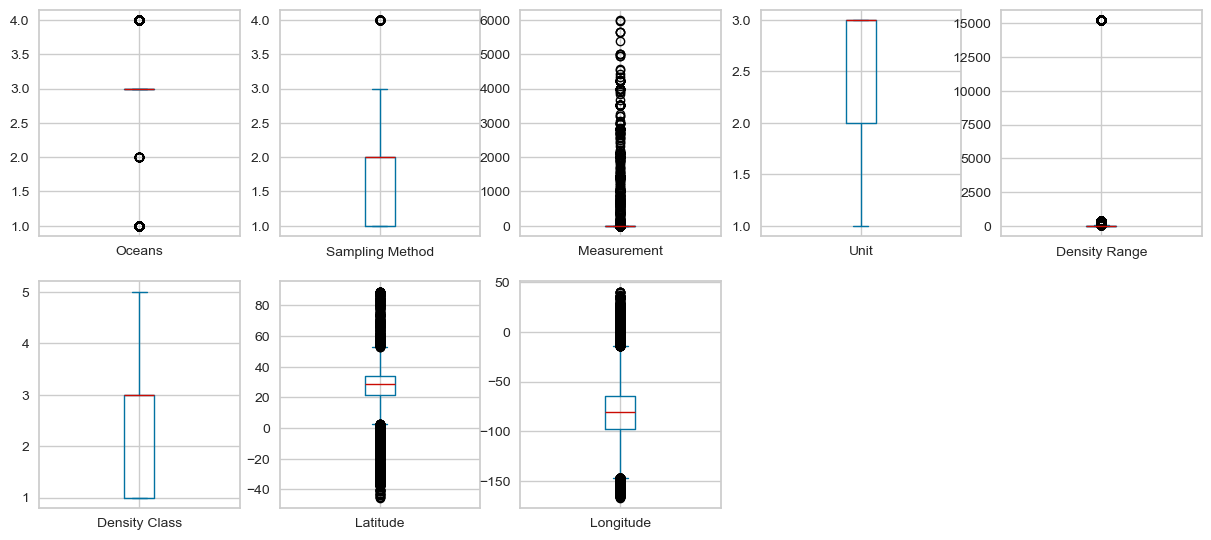

In [33]:
dfdr= dfd.drop(columns=['Date', 'Accession Number'])
dfdr.plot(kind='box', subplots=True, layout=(3, 5), sharex=False, sharey=False, figsize=(15, 10))
plt.show()

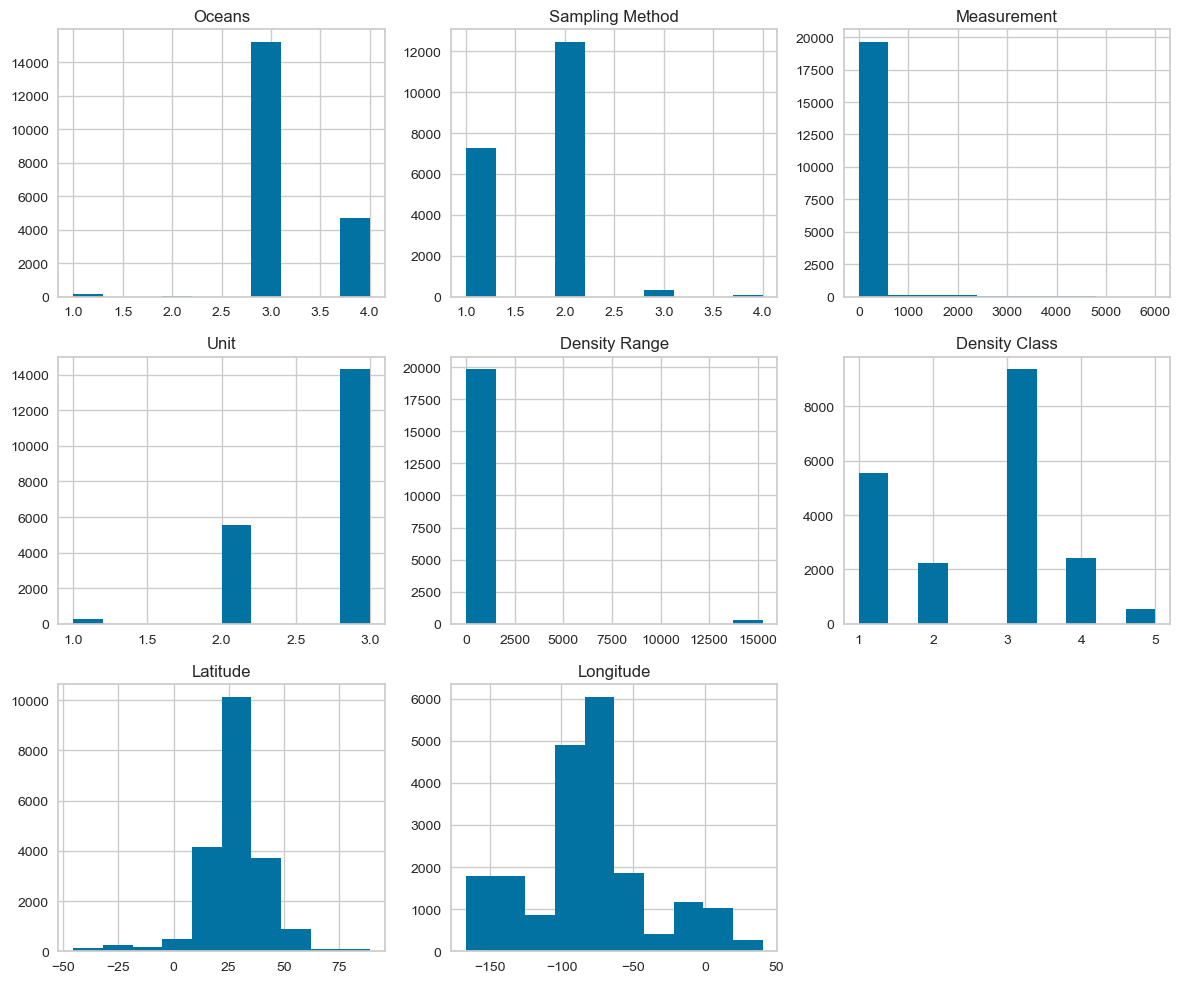

In [34]:
dfdr.hist(figsize=(12, 10))

plt.tight_layout()

plt.show()

In [35]:
corr = dfdr.corr()
corr

,Oceans,Sampling Method,Measurement,Unit,Density Range,Density Class,Latitude,Longitude
Oceans,1.000000,0.102354,0.048015,0.204151,0.096746,-0.111266,-0.273189,-0.677831
Sampling Method,0.102354,1.000000,-0.067109,0.610424,-0.159352,-0.172762,0.043992,0.150907
Measurement,0.048015,-0.067109,1.000000,0.034746,0.702762,0.157209,-0.046851,-0.008897
Unit,0.204151,0.610424,0.034746,1.000000,0.063155,-0.225956,-0.140916,0.092208
Density Range,0.096746,-0.159352,0.702762,0.063155,1.000000,0.071026,-0.040310,-0.046547
Density Class,-0.111266,-0.172762,0.157209,-0.225956,0.071026,1.000000,0.107709,0.125899
Latitude,-0.273189,0.043992,-0.046851,-0.140916,-0.040310,0.107709,1.000000,0.228384
Longitude,-0.677831,0.150907,-0.008897,0.092208,-0.046547,0.125899,0.228384,1.000000


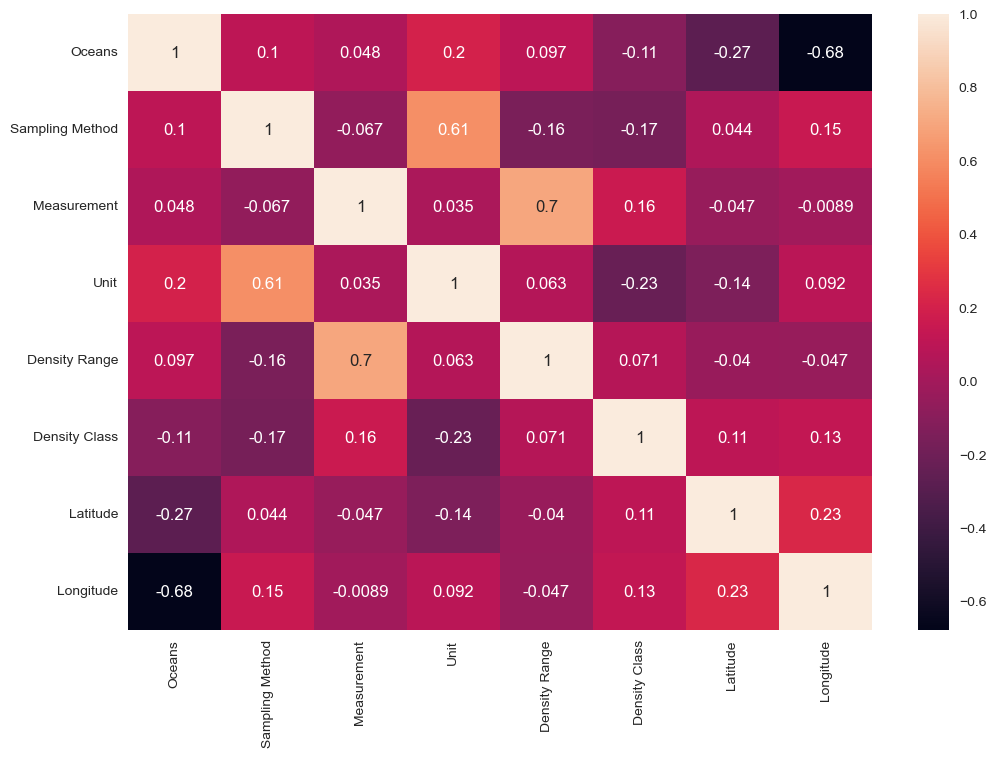

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.show()

In [37]:
dfs= dfd.drop(columns=['Accession Number','Latitude','Longitude'])

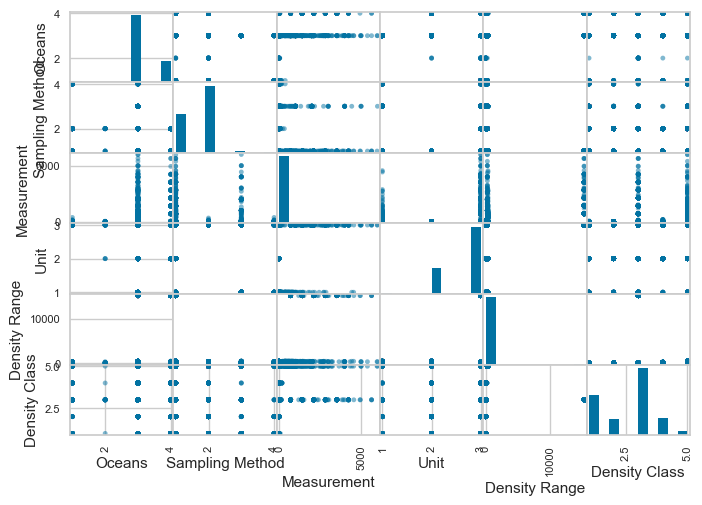

In [38]:
scatter_matrix(dfs)
plt.show()

In [39]:
dfs

,Oceans,Sampling Method,Measurement,Unit,Density Range,Density Class,Date
0,3.0,1,0.0180,3,0.50250,3,2015-08-11
1,4.0,2,0.0000,3,0.00025,1,2002-12-18
2,4.0,2,0.0130,3,0.50250,3,2006-10-17
3,3.0,1,1368.0000,3,255.00000,5,2018-10-17
4,4.0,1,0.0010,3,0.00275,2,2015-01-03
...,...,...,...,...,...,...,...
20099,3.0,1,0.0110,3,0.50250,3,2015-02-01
20100,3.0,2,0.0216,3,0.50250,3,2001-03-14
20101,3.0,2,0.0000,3,0.00025,1,2008-05-01
20102,3.0,1,0.0000,2,120.00000,4,2021-10-28


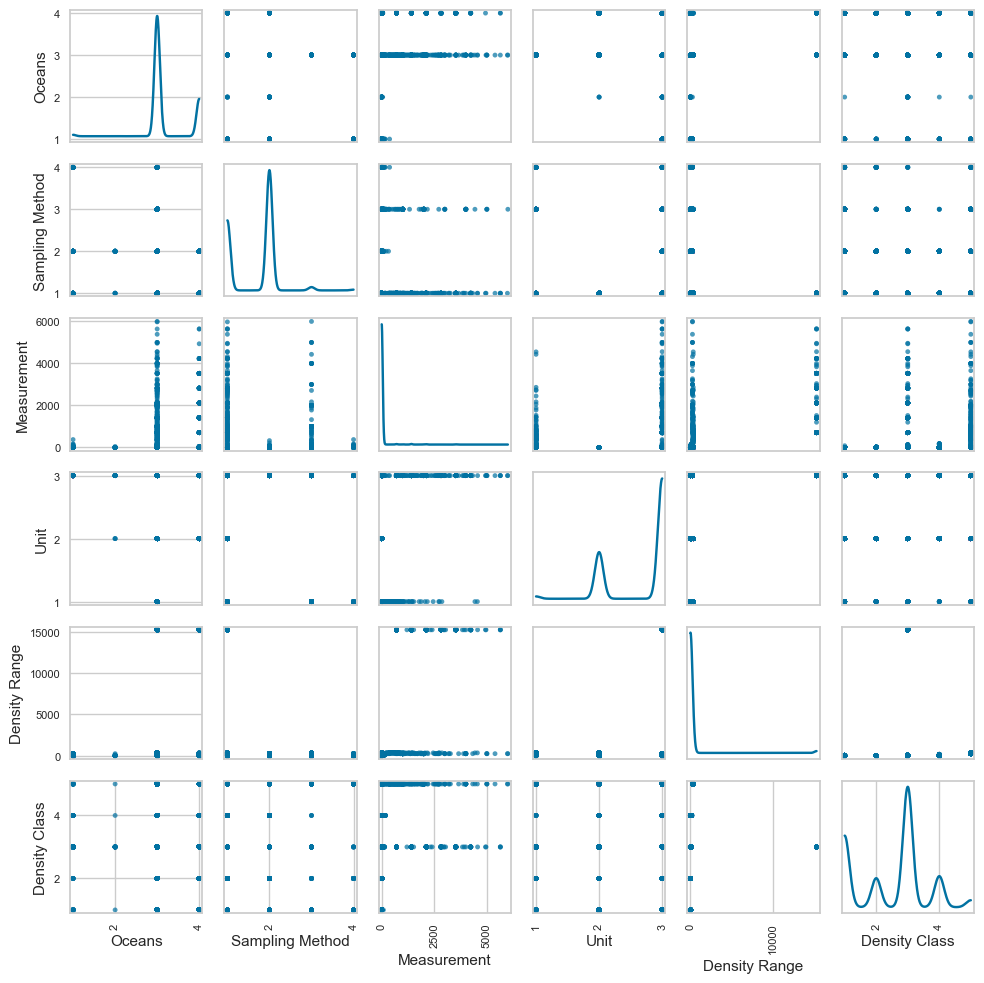

In [40]:
dfs['Measurement'] = pd.to_numeric(dfs['Measurement'], errors='coerce')

threshold = dfs['Measurement'].quantile(1.00)
dfs_clean = dfs[dfs['Measurement'] <= threshold]
scatter_matrix(dfs_clean, figsize=(10, 10), diagonal='kde', alpha=0.7)

plt.tight_layout()
plt.show()

In [41]:
max = dfs['Measurement'].max()

max

6000.0

In [42]:
count = dfs[dfs['Measurement'] > 6000].shape[0]

count


0

In [43]:
dfdr

,Oceans,Sampling Method,Measurement,Unit,Density Range,Density Class,Latitude,Longitude
0,3.0,1,0.0180,3,0.50250,3,-31.696000,-48.560000
1,4.0,2,0.0000,3,0.00025,1,6.350000,-121.850000
2,4.0,2,0.0130,3,0.50250,3,0.500000,-95.350000
3,3.0,1,1368.0000,3,255.00000,5,0.631825,-45.398158
4,4.0,1,0.0010,3,0.00275,2,16.623000,-99.697800
...,...,...,...,...,...,...,...,...
20099,3.0,1,0.0110,3,0.50250,3,17.100000,-47.550000
20100,3.0,2,0.0216,3,0.50250,3,21.390000,-81.960000
20101,3.0,2,0.0000,3,0.00025,1,24.140000,-81.980000
20102,3.0,1,0.0000,2,120.00000,4,39.924800,-75.127200


In [44]:
dt= dfdr.drop(columns=['Latitude', 'Longitude'])
dt

,Oceans,Sampling Method,Measurement,Unit,Density Range,Density Class
0,3.0,1,0.0180,3,0.50250,3
1,4.0,2,0.0000,3,0.00025,1
2,4.0,2,0.0130,3,0.50250,3
3,3.0,1,1368.0000,3,255.00000,5
4,4.0,1,0.0010,3,0.00275,2
...,...,...,...,...,...,...
20099,3.0,1,0.0110,3,0.50250,3
20100,3.0,2,0.0216,3,0.50250,3
20101,3.0,2,0.0000,3,0.00025,1
20102,3.0,1,0.0000,2,120.00000,4


### Unsupervised

In [46]:
X = dt[['Oceans', 'Measurement']].values
X

array([[3.   , 0.018],
       [4.   , 0.   ],
       [4.   , 0.013],
       ...,
       [3.   , 0.   ],
       [3.   , 0.   ],
       [3.   , 0.326]])

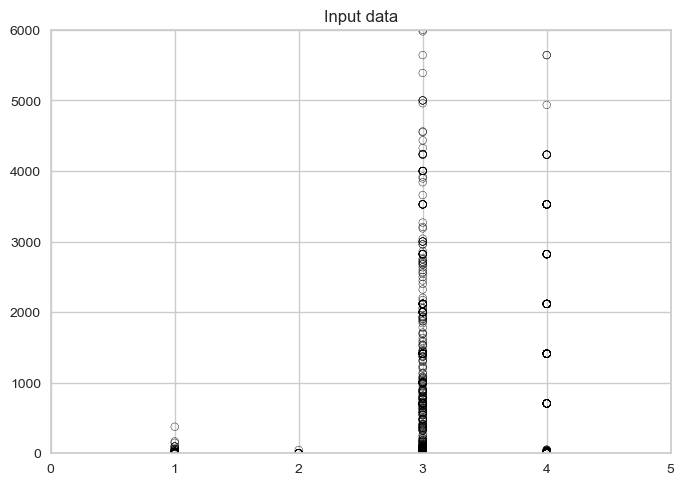

In [47]:
# Plot the input data
# a. creates figure
plt.figure()
plt.title('Input data')

# b. get the range of X and Y (long way)
# first column
x_min = X[:, 0].min()
x_max = X[:, 0].max()

# second column
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# same as above: get the range of X and Y (short way)
# x_min, x_max = X[:, 0].min(), X[:, 0].max()
# y_min, y_max = X[:, 1].min(), X[:, 1].max()

# c. set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# plot the points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()

In [48]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
# We try training models for all possible number of clusters in the range and calculate their distrtion
K = range(2,20)
for k in K:
    model = KMeans(n_clusters=k, n_init=10).fit(X)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
# print all distortions to identify the lowest gain
print("Distortion: ", distortions)

Distortion:  [29.107407391862687, 17.515034320086375, 10.834145227304116, 9.163927812183465, 6.323629206096139, 5.28449763188305, 4.55980517093298, 3.7031915805684426, 3.1568035917669235, 3.0350914170808814, 2.5059030032331275, 2.45988609308085, 2.203924265023214, 2.081606486095908, 2.038214849707257, 1.8848467240456104, 1.8503669687973165, 1.8141976566188955]


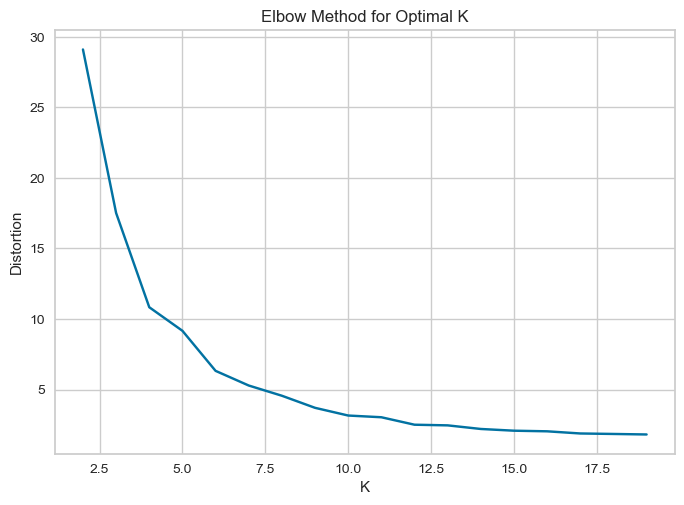

In [49]:
# Plot the distortion to discover the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [50]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,20)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.983669691564445

Number of clusters = 3
Silhouette score = 0.9839740942566801

Number of clusters = 4
Silhouette score = 0.986577818875767

Number of clusters = 5
Silhouette score = 0.9875861795291674

Number of clusters = 6
Silhouette score = 0.9887110626073671

Number of clusters = 7
Silhouette score = 0.989746145869709

Number of clusters = 8
Silhouette score = 0.9903571075607793

Number of clusters = 9
Silhouette score = 0.990494720056674

Number of clusters = 10
Silhouette score = 0.9890509715364999

Number of clusters = 11
Silhouette score = 0.989390272968261

Number of clusters = 12
Silhouette score = 0.9892531672195104

Number of clusters = 13
Silhouette score = 0.97886368691543

Number of clusters = 14
Silhouette score = 0.9781510939484751

Number of clusters = 15
Silhouette score = 0.975880750709544

Number of clusters = 16
Silhouette score = 0.9758312135434896

Number of clusters = 17
Silhouette score = 0.9772874823066402

Number 

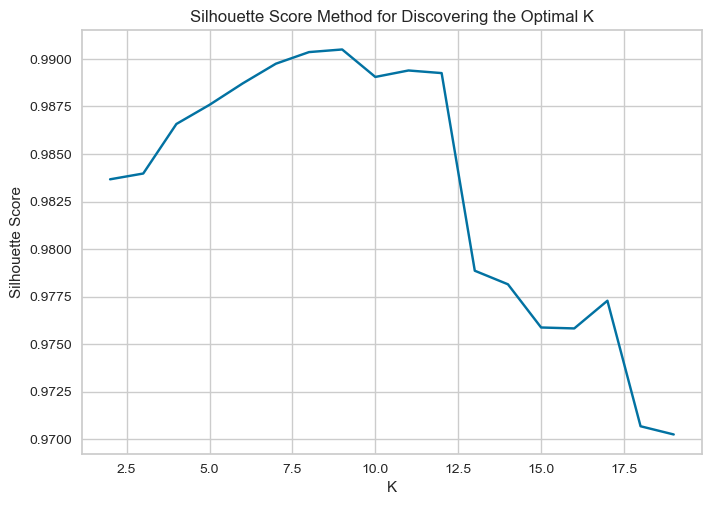

In [51]:
# Plot the elbow
plt.title('Silhouette Score Method for Discovering the Optimal K')
plt.plot(K, scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [52]:
num_clusters = 9

In [53]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)


In [54]:
# Train the KMeans clustering model
kmeans.fit(X)

KMeans(n_clusters=9, n_init=20)

## Implementing the Model

In [56]:
y = kmeans.predict(X)
y

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
# See the predicted labels of clusters
# cluster labels are stored in variable 'kmeans.labels_'
print(kmeans.labels_)


[0 0 0 ... 0 0 0]


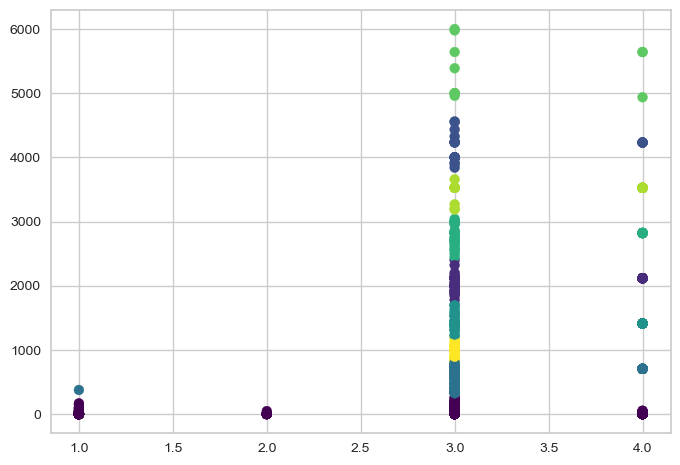

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

plt.grid(True)
plt.show()

In [59]:
# See the cluster centres, created during the clustering
# cluster centres are stored in a variable named 'cluster_centers_'
print(kmeans.cluster_centers_)

[[3.21234555e+00 8.99856649e-01]
 [3.34375000e+00 2.06463357e+03]
 [3.25000000e+00 4.15438720e+03]
 [3.27642276e+00 6.28815081e+02]
 [3.50467290e+00 1.42129249e+03]
 [3.36734694e+00 2.79753427e+03]
 [3.27272727e+00 5.38082823e+03]
 [3.69230769e+00 3.50607121e+03]
 [3.00000000e+00 9.87921641e+02]]


In [60]:
step_size = 0.01

# we need to cover all points of our data
# create a grid out of an array of X values and an array of y values
x_coord = np.arange(x_min, x_max, step_size)
y_coord = np.arange(y_min, y_max, step_size)

# meshgrid() creates a matrix of coordinates from the two vectors of coordinates
x_vals, y_vals = np.meshgrid(x_coord, y_coord)

In [61]:
# Predict cluster labels for all the points on the grid 
# ravel() returns 1D-array
xx = x_vals.ravel()
yy = y_vals.ravel()

# np.c_ concatenates the arguments
labels = kmeans.predict(np.c_[xx,yy])
labels = labels.reshape(x_vals.shape)

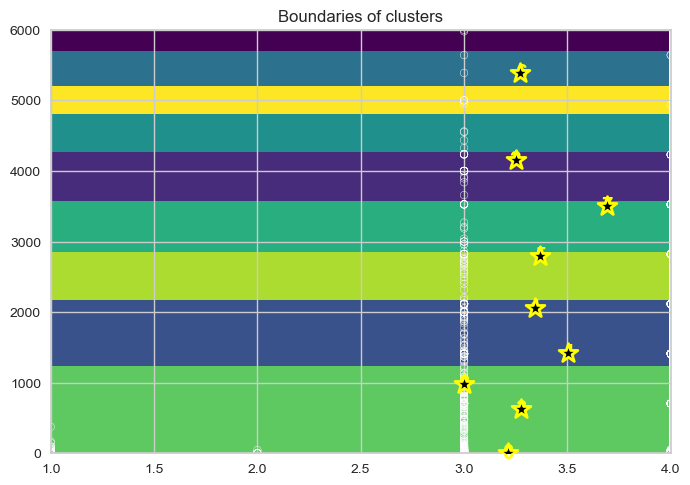

In [62]:
# Plot the clusters
# create new plot area
plt.figure()
# clear the plot area
plt.clf()

plt.title('Boundaries of clusters')

# plot the frame
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plot the clusters 
plt.imshow(labels, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
           cmap='viridis', aspect='auto')
# plot the points as they belong to the clusters
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='white', s=30) 

# plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],  s=200, linewidths=2, color='yellow', marker='*', zorder=3, facecolors='black')

# annotate the centroids
for i, center in enumerate(centers):
    plt.annotate(i, center+[0.0,1.0], 
                 size=15, zorder=1, color='yellow', weight='bold', 
                 horizontalalignment='center', verticalalignment='center',) 
plt.show()

In [63]:
k = 9
model = KMeans(n_clusters=k, n_init=10)
model.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
score = silhouette_score(X, model.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.990


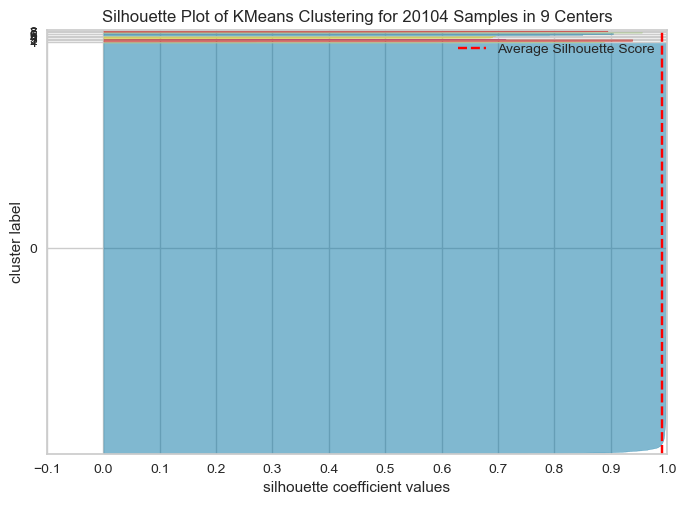

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 20104 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [65]:
# Visualize the silhouette scores of all points
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()  

In [66]:
X2= dt.iloc[:, 1:6].values
X2

array([[1.000e+00, 1.800e-02, 3.000e+00, 5.025e-01, 3.000e+00],
       [2.000e+00, 0.000e+00, 3.000e+00, 2.500e-04, 1.000e+00],
       [2.000e+00, 1.300e-02, 3.000e+00, 5.025e-01, 3.000e+00],
       ...,
       [2.000e+00, 0.000e+00, 3.000e+00, 2.500e-04, 1.000e+00],
       [1.000e+00, 0.000e+00, 2.000e+00, 1.200e+02, 4.000e+00],
       [2.000e+00, 3.260e-01, 3.000e+00, 5.025e-01, 3.000e+00]])

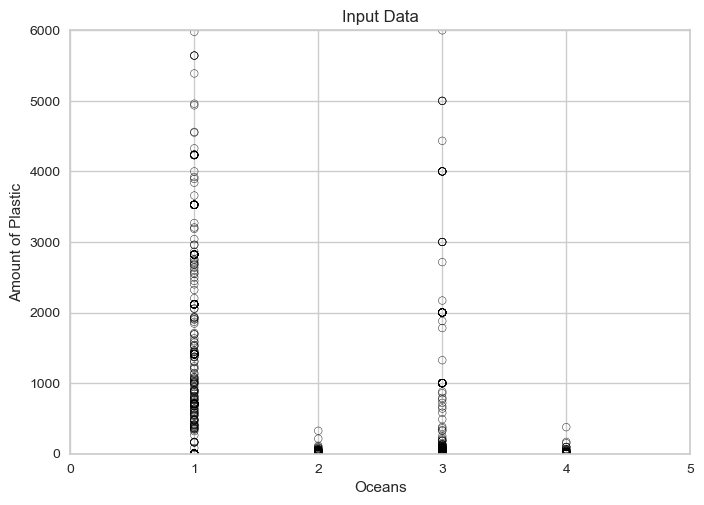

In [67]:
plt.figure()
plt.title('Input Data')

# Get the range for the first two columns
x_min2 = X2[:, 0].min()
x_max2 = X2[:, 0].max()

y_min2 = X2[:, 1].min()
y_max2 = X2[:, 1].max()

# Set plot limits
plt.xlim(x_min2 - 1, x_max2 + 1)
plt.ylim(y_min2 - 1, y_max2 + 1)

# Plot the points (first two columns of X2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', facecolors='none', edgecolors='black', s=30)
plt.xlabel('Oceans')
plt.ylabel('Amount of Plastic')
plt.show()


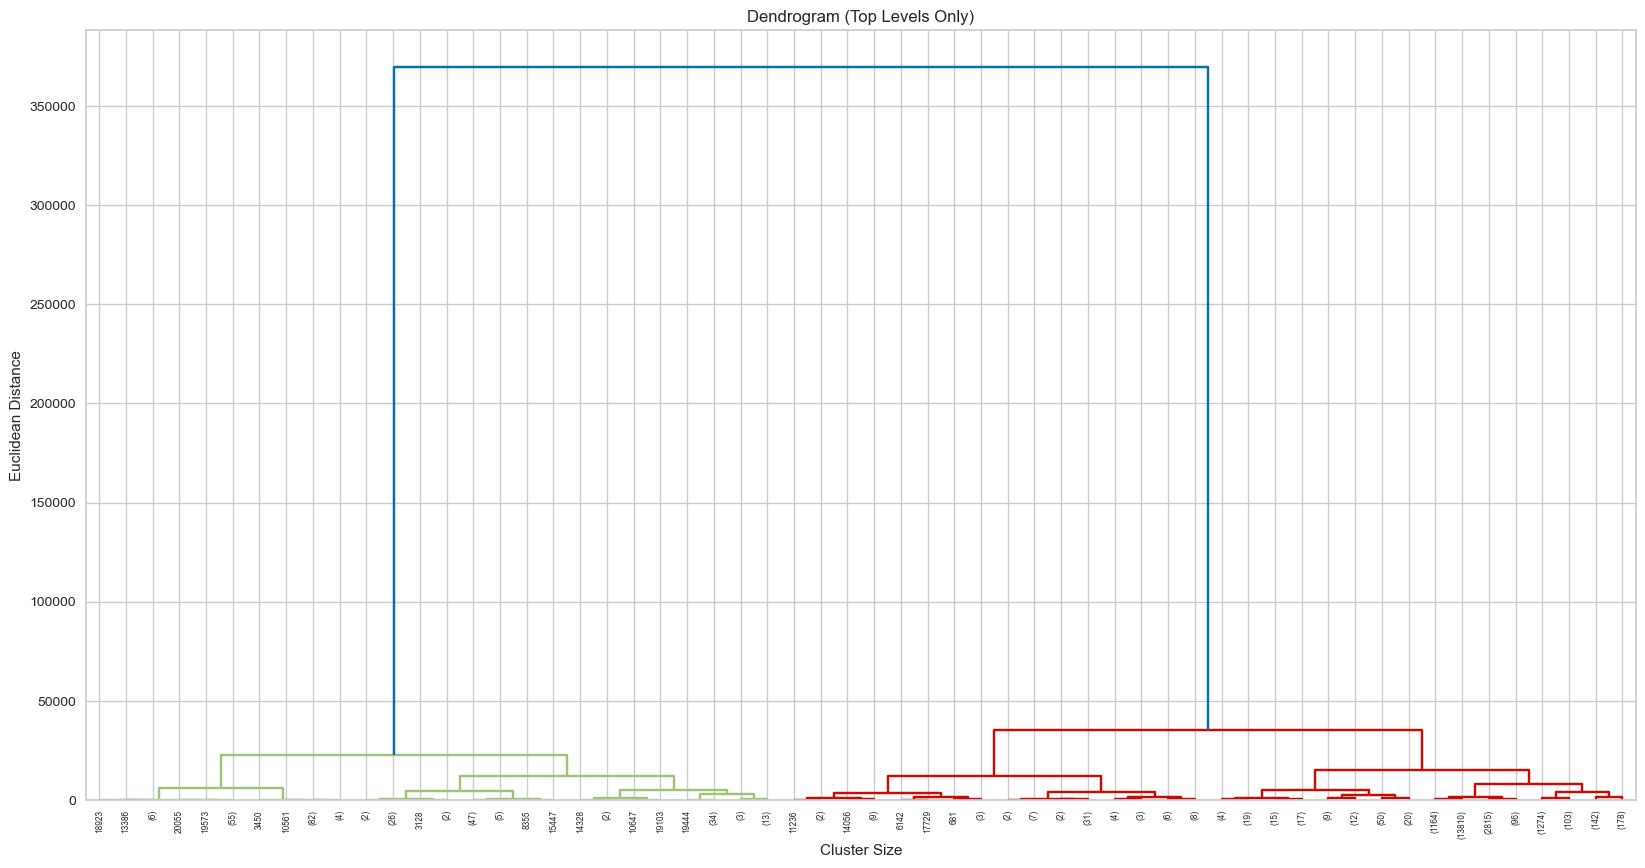

In [68]:
# Use dendogram to find the optimal number of clusters
plt.figure(figsize=(20, 10))

# Use truncate_mode='level' to only show the top part of the dendrogram
dendrogram = ch.dendrogram(ch.linkage(X2, method='ward'), truncate_mode='level', p=5)

plt.title('Dendrogram (Top Levels Only)')
plt.xlabel('Cluster Size')
plt.ylabel('Euclidean Distance')
plt.show()

In [69]:
n_clusters=k
model = AgglomerativeClustering(n_clusters, metric = 'euclidean', linkage = 'ward')
model.fit(X)

AgglomerativeClustering(n_clusters=9)

In [70]:
X2

array([[1.000e+00, 1.800e-02, 3.000e+00, 5.025e-01, 3.000e+00],
       [2.000e+00, 0.000e+00, 3.000e+00, 2.500e-04, 1.000e+00],
       [2.000e+00, 1.300e-02, 3.000e+00, 5.025e-01, 3.000e+00],
       ...,
       [2.000e+00, 0.000e+00, 3.000e+00, 2.500e-04, 1.000e+00],
       [1.000e+00, 0.000e+00, 2.000e+00, 1.200e+02, 4.000e+00],
       [2.000e+00, 3.260e-01, 3.000e+00, 5.025e-01, 3.000e+00]])

In [71]:
Y2 = model.fit_predict(X2)
Y2

array([7, 7, 7, ..., 7, 4, 7], dtype=int64)

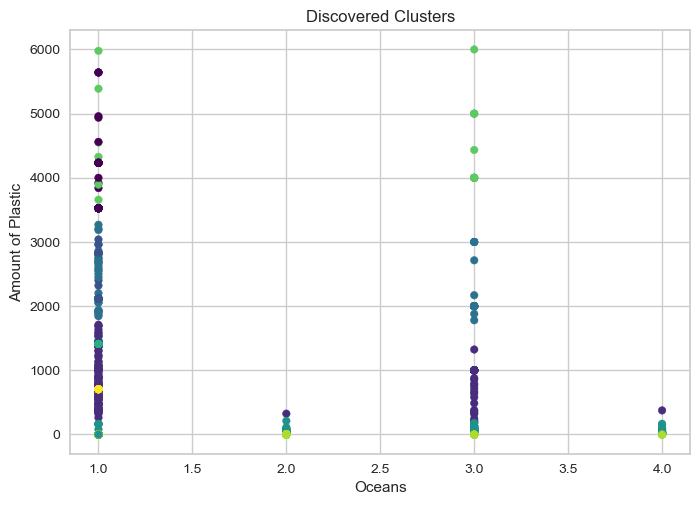

In [72]:
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X2[:, 0], X2[:, 1], s=30, c=Y2, cmap='viridis')
plt.title('Discovered Clusters')
plt.xlabel('Oceans')
plt.ylabel('Amount of Plastic')
# plt.legend()
plt.show()

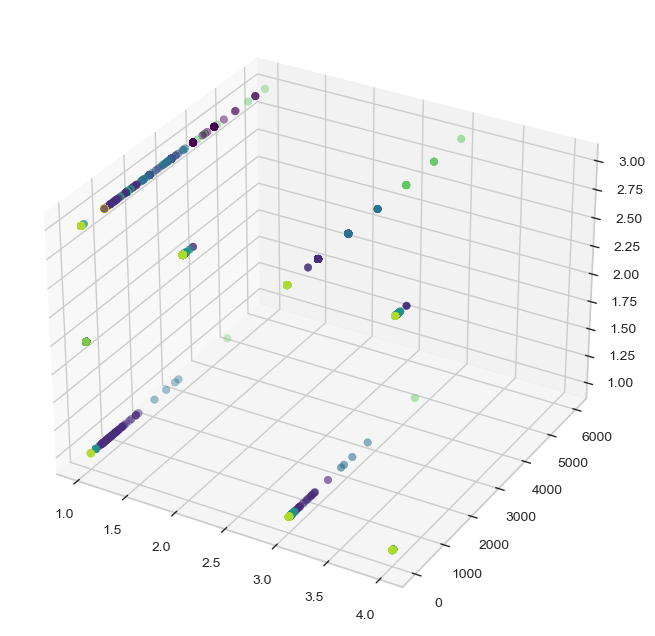

In [73]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2[:,0], X2[:,1], X2[:,2], marker='o', s=30, c=Y2, cmap='viridis')

plt.show()

## Supervised

This project aimed to explore the spread of microplastic pollution across different oceans and predict pollution levels using features like sampling methods and density ranges. We applied Random Forest models for both classification and regression tasks.

In [76]:
X3 = dt[['Sampling Method', 'Measurement', 'Unit', 'Density Class', 'Density Range']].values

y3 = dt['Oceans'].values

In [77]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X3_train, y3_train)

# Predict plastic measurement on the test set
y_pred3 = rf_reg.predict(X3_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y3_test, y_pred3)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.20


The model performed particularly well on Class 3.0 (F1-score: 0.86), which represents the majority ocean region in the dataset. However, the model struggled to accurately classify instances from minority classes, such as Class 1.0 (F1-score: 0.27) and Class 4.0 (F1-score: 0.34). This is attributed to the imbalance in the dataset, where some classes had very few instances. Class 2.0 had only 3 instances in the test set, resulting in 0 precision, recall, and F1-score, indicating that the model was unable to correctly classify any examples from this class.

In [79]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X3_train, y3_train)

# Predict the ocean on the test set
y3_pred = rf.predict(X3_test)

# Evaluate the model (accuracy score)
accuracy = accuracy_score(y3_test, y3_pred)
print(f"Accuracy of the Random Forest Classifier: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y3_test, y3_pred))

Accuracy of the Random Forest Classifier: 0.76
Classification Report:
               precision    recall  f1-score   support

         1.0       0.37      0.22      0.27        32
         2.0       0.00      0.00      0.00         3
         3.0       0.79      0.93      0.86      3038
         4.0       0.55      0.25      0.34       948

    accuracy                           0.76      4021
   macro avg       0.43      0.35      0.37      4021
weighted avg       0.73      0.76      0.73      4021



The Random Forest Classifier achieved an accuracy of 76% in predicting the ocean based on microplastic measurements, with particularly high precision in the Atlantic region. Arctic Ocean: 1, Indian Ocean: 2, Atlantic Ocean: 3, Pacific Ocean: 4

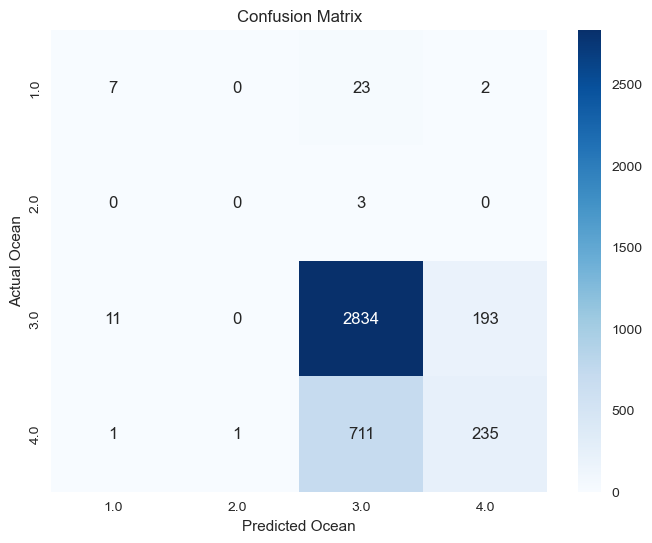

In [81]:
cm = confusion_matrix(y3_test, y3_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y3), yticklabels=set(y3))
plt.ylabel('Actual Ocean')
plt.xlabel('Predicted Ocean')
plt.title('Confusion Matrix')
plt.show()

The feature importance plot shows that Measurement is the dominant feature, with an importance score of 0.76. Other features like Unit, Density Range, Sampling Method, and Density Class have much smaller impacts. This suggests that microplastic pollution levels recorded in Measurement drive the predictions, while factors like data collection methods and density class are less influential. Future research should focus on improving the accuracy of Measurement data.


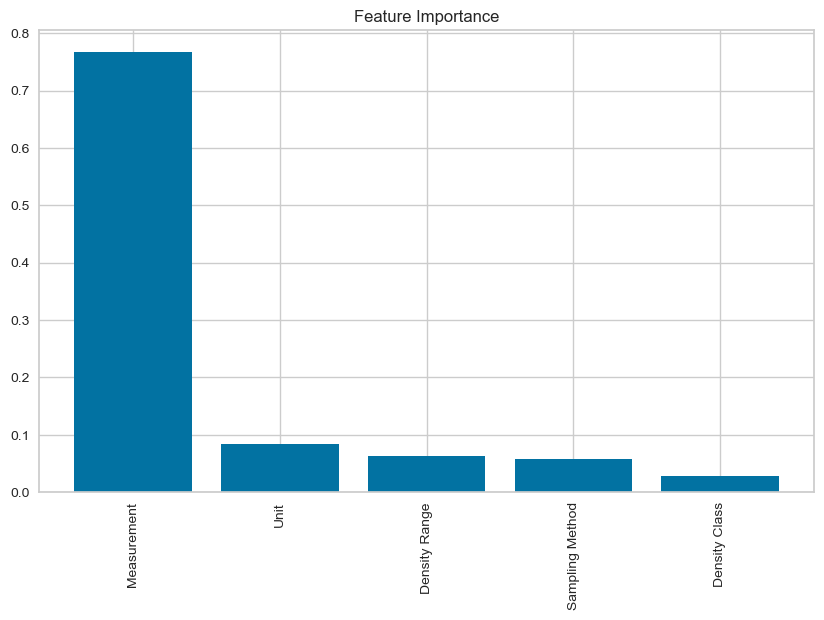

In [83]:
importance = rf.feature_importances_
feature_names = ['Sampling Method', 'Measurement', 'Unit', 'Density Class', 'Density Range']
indices = np.argsort(importance)[::-1]

# Plot the feature importance
plt.figure(figsize=(10,6))
plt.bar(range(len(importance)), importance[indices])
plt.xticks(range(len(importance)), [feature_names[i] for i in indices], rotation=90)
plt.title("Feature Importance")
plt.show()

In [84]:
cv_scores = cross_val_score(rf, X3, y3, cv=5)
print(f"Cross-validated accuracy: {cv_scores.mean():.2f}")

Cross-validated accuracy: 0.77


In [85]:
X4 = dt[['Oceans', 'Sampling Method', 'Measurement', 'Unit', 'Density Range']]
y4 = dt['Density Class']  


# Train-test split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Train the model
clf = RandomForestClassifier()
clf.fit(X4_train, y4_train)

# Make predictions
y4_pred = clf.predict(X4_test)

# Evaluate
accuracy = accuracy_score(y4_test, y4_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [86]:
print(dt['Density Class'].value_counts())


Density Class
3    9347
1    5556
4    2410
2    2251
5     540
Name: count, dtype: int64


With this model the Density Range feature was the most important predictor of pollution levels, followed by the measurement.
But also a big risk of overfitting. Density Class: Very Low: 1, Low: 2, Medium: 3, High: 4, Very High: 5

In [88]:
cv_scores4 = cross_val_score(clf, X4, y4, cv=5)
print(f"Cross-validation accuracy: {cv_scores4.mean()}")

Cross-validation accuracy: 0.9998507833872171


The Random Forest Classifier relies heavily on Density Range and Measurement for pollution classification, with other features playing smaller roles. These insights can guide future research on microplastic pollution by emphasizing the need for accurate data collection in these key areas. Moreover, the feature importance plot effectively communicates which variables are driving the model's predictions, providing a clear path for future data-driven interventions.

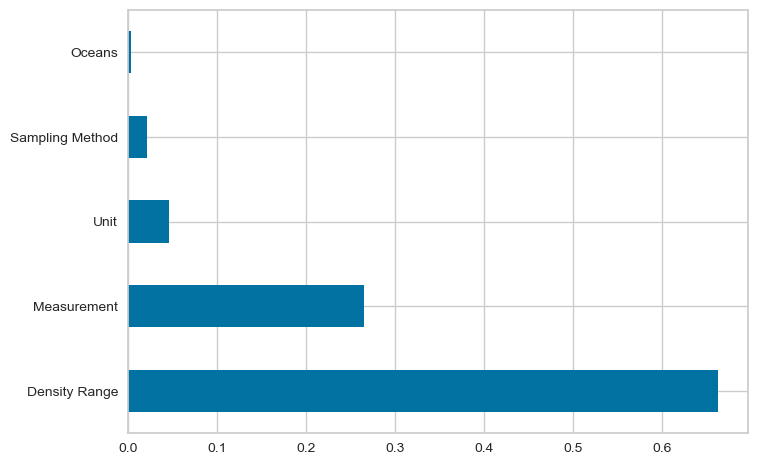

In [90]:
feature_importances = pd.Series(clf.feature_importances_, index=X4.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

The bar plot shows that Ocean 4.0 has the highest average pollution, followed by Ocean 3.0, while Ocean 1.0 and Ocean 2.0 have much lower pollution levels. The larger variability in Ocean 3.0 and 4.0 suggests uneven distribution, possibly due to ocean currents or inconsistent sampling. Oceans 1.0 and 2.0 show more consistent, lower pollution levels. This highlights the need to focus mitigation efforts in Oceans 3.0 and 4.0, where the microplastic problem is most severe. Arctic Ocean: 1, Indian Ocean: 2, Atlantic Ocean: 3, Pacific Ocean: 4

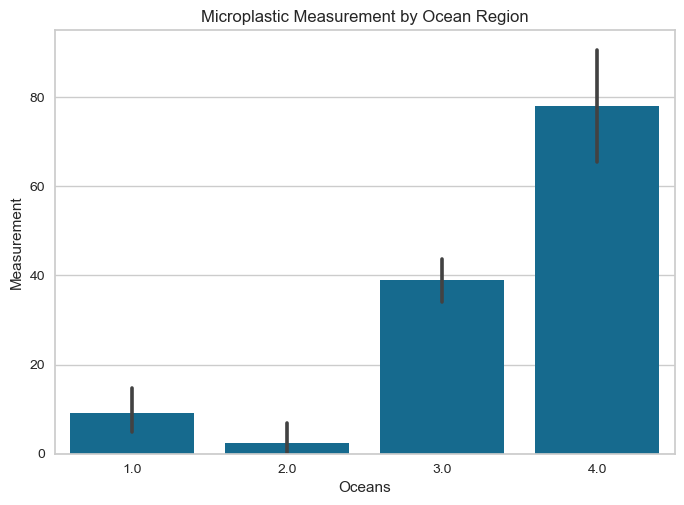

In [92]:
sns.barplot(x='Oceans', y='Measurement', data=dt)
plt.title('Microplastic Measurement by Ocean Region')
plt.show()